In [1]:
def merge(contour1, contour2):
    n1 = len(contour1)
    n2 = len(contour2)
    
    h1 = 0
    h2 = 0
    i = 0
    j = 0
    
    res = []
    def append(x, y):
        n = len(res)
        if n > 0 and res[-1][1] == y:
            return
        if n > 0 and res[-1][0] == x:
            res[-1] = (res[-1][0], max(res[-1][1], y))
            return
        res.append((x, y))

    while i < n1 and j < n2:
        if contour1[i][0] < contour2[j][0]:
            x1 = contour1[i][0]
            h1 = contour1[i][1]
            maxh = max(h1, h2)
            append(x1, maxh)
            i += 1
        else:
            x2 = contour2[j][0]
            h2 = contour2[j][1]
            maxh = max(h1, h2)
            append(x2, maxh)
            j += 1
            
    for k in range(i, n1):
        x, y = contour1[k]
        append(x, y)
    for k in range(j, n2):
        x, y = contour2[k]
        append(x, y)
        
    return res

In [2]:
def skyline(buildings, i, f):
    if i == f:
        g, h, d = buildings[i]
        return [(g, h), (d, 0)]
    else:
        m = (i + f) // 2
        return merge(skyline(buildings, i, m), skyline(buildings, m + 1, f))

In [3]:
buildings = [(3, 13, 9), (1, 11, 5), (19, 18, 22), (3, 6, 7), (16, 3, 25), (12, 7, 16)]
path = skyline(buildings, 0, len(buildings)-1)

In [4]:
verts = [(0, 0)]
for i in range(len(path)):
    verts.append((path[i][0], verts[-1][1]))
    verts.append(path[i])
print(path)
print(verts)

[(1, 11), (3, 13), (9, 0), (12, 7), (16, 3), (19, 18), (22, 3), (25, 0)]
[(0, 0), (1, 0), (1, 11), (3, 11), (3, 13), (9, 13), (9, 0), (12, 0), (12, 7), (16, 7), (16, 3), (19, 3), (19, 18), (22, 18), (22, 3), (25, 3), (25, 0)]


In [5]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

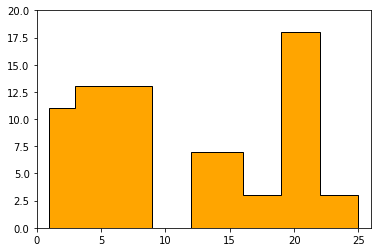

In [9]:
n = len(verts)
codes = [Path.LINETO]*n
codes[ 0] = Path.MOVETO
#codes[-1] = Path.CLOSEPOLY

path = Path(verts, codes)

fig = plt.figure()
ax = fig.add_subplot(111)
patch = patches.PathPatch(path, facecolor='orange', lw=1)
ax.add_patch(patch)
ax.set_xlim(0,26)
ax.set_ylim(0,20)
plt.show()